<h2 style="text-align: center">Depression Anxiety Stress Scales Responses<h2>

<p style="line-height: 2">Depression Anxiety Stress Scales Responses is a dataset that was collected online from the various countries during the year of 2017 to 2019 by Openpsychometrics.org on <a href="www.psy.unsw.edu.au/dass">Psychology Foundation of Australia | DASS</a> in effort to educate the public about psychology. This dataset contains some background information of the respondents such as their race, education, religion, gender, etc. Furthermore, this dataset includes their responses from the 42 related negative emotional questions which is answerable from the scale of 1 to 4, and the 10-item personality test which is answerable from the scale of 1 to 7. Lastly, this dataset also contains the technical information of the respondent such as, what device they used while taking the test, where they found the test, etc. </p>
<br>
<br>
<p>To check the dataset, <a href="https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses">click me</a>.</p>
<br>
<hr>

<h1 style="text-align: center">Depression Scale Prediction | [ EDA + 100% Accuracy using SVML ]</h1>

<img src="image.jpg" style="width: 95%">

<h3 style="text-align: center; letter-spacing: 2px; text-transform: uppercase">Depression</h3>

<p style="text-align: center; width: 70%; margin: 0 auto">Depression is a mood disorder that causes a persistent feeling of sadness and loss of interest. It is also called as major depressive disorder or clinical depression, it affects how you feel, think and behave, and can lead to a variety of emotional and physical problems.</p>


<hr>

<h2>Machine Learning Project Abouts</h2>

<p style="line-height: 2">This machine learning project will create a predictive model using an algorithm that has the highest possible decent accuracy from the various machine learning algorithms. The said model will predict the level of depression of a respondent based on their responses from the 14 depressive emotional questions, 10-item personality test, and their basic information. Lastly, this project will also extract insights and interpret it from the given dataset. <p>

<b>General Objective</b>: Create a machine learning model that can predict the scale of depression of a person. 

<b>Specific Objectives</b>:

<ul>
    <li>Get insights from multiple features of the dataset.</li>
    <li>Apply various preprocessing techniques to the dataset.</li>
    <li>Create a machine learning model using the Support Vector Machine, Logistic Regression, Decision Tree Classfier, and GaussianNB.</li>
    <li>Compare the performance of the machine learning model using the classification accuracy and confusion matrix to evaluate the performance metrics.</li>
    <li>Deploy the model that has achieved the highest accuracy.</li>
    <li>Develop the front end application using Python Flask framework.</li>
</ul>

<b>Methodology</b>:

<ul>
    <li>Apply data cleaning and preprocessing.</li>
    <li>Summarize the exploration and add analysis with visualization and interpretation in it.</li>
    <li>Run multiple machine learning model and use the appropriate algorithm.</li>
    <li>Import multiple libraries</li>
    <li>Deploy the model in Python Flask Web Framework.</li>
</ul>

<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Import Libraries</b></p>

In [9]:
# TOOLS
import pandas as pd
import numpy as np

# VISUAL
import matplotlib.pyplot as plt
import seaborn as sns

# SETTING
import warnings 
warnings.filterwarnings("ignore")

# SK.LEARN
from sklearn.preprocessing import MinMaxScaler


<hr>


<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Self-made Functions</b></p>

In [10]:
def computeIQR(target):
    Q25 = np.percentile(target, 25)
    Q75 = np.percentile(target, 75)
    IQR = Q75 - Q25
    lowerlimit = max(0, Q25 - 1.5 * IQR)
    upperlimit = Q75 + 1.5 * IQR
    return lowerlimit, upperlimit

def computeSTD(target):
    mean = np.mean(target)
    std = np.std(target)
    lowerlimit = max(0, mean - 3 * std)
    upperlimit = mean + 3 * std
    return lowerlimit, upperlimit

<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Importing the data</b></p>

In [11]:
# SETTING FOR TABLE
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# DATA READING
dataframe = pd.read_csv('data.csv', delimiter = '\t')
dataframes = pd.read_csv('cleaned_data.csv')

In [12]:
dataframe.sample(5)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
27634,3,1,25118,3,4,5747,3,33,3465,1,17,11310,2,41,2058,2,6,5309,1,10,9555,2,27,2138,3,34,35427,4,19,2478,3,16,2151,2,24,3485,3,38,2550,4,7,6087,1,39,2039,4,9,2853,4,20,1600,4,12,2496,1,25,2993,2,18,8185,4,14,3069,2,5,33822,1,32,1684,2,3,10938,2,23,12838,4,21,1502,3,8,2201,2,36,1979,2,37,3795,2,22,12726,3,35,2258,3,15,5197,2,42,3806,4,28,1460,2,2,17374,2,40,1583,4,13,4275,4,11,2332,2,30,2494,2,29,5391,3,26,3937,4,31,7550,MY,1,11,281,199,5,1,6,6,2,7,7,5,2,6,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,3,2,2,23,1,1,1,10,1,10,2,1,4,Science
24038,3,12,3526,2,19,5731,2,22,5760,3,7,7315,3,37,2994,2,26,5002,3,29,4972,3,38,4174,3,13,4882,2,33,3155,4,2,9922,3,4,7450,3,41,3373,2,30,8770,3,42,3863,3,16,4105,2,9,5412,2,28,19153,3,20,10694,2,3,7511,2,14,2848,2,8,6006,3,34,5692,2,36,4670,3,32,7331,3,40,3566,2,10,38217,3,5,4273,2,15,5539,3,18,6149,2,39,30729,3,1,7889,2,17,3092,2,23,3522,3,11,7697,3,27,2729,2,6,9721,2,21,3044,3,31,37230,3,25,4879,2,24,3462,2,35,4796,MY,0,5,371,420,6,4,7,6,6,7,7,6,6,7,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,2,1,2,2,18,1,1,2,10,1,10,2,1,4,Business
30455,3,11,2903,1,14,6821,2,23,2952,1,29,4877,2,38,2557,2,22,3278,1,18,2879,1,40,2950,2,5,3231,3,7,2438,3,19,3446,1,34,2253,2,39,3235,4,26,4564,1,24,695,3,36,2476,2,10,3313,2,31,2313,1,6,1253,2,4,2695,1,15,2046,2,16,2314,1,41,2002,3,1,14854,1,21,13455,1,28,3761,4,9,3699,1,33,2590,2,2,5784,2,3,6148,4,37,932,2,20,4003,1,27,4429,3,8,2684,3,12,3315,1,25,610,1,42,4020,2,13,2381,3,32,2152,2,35,5459,3,30,2912,2,17,2347,MY,1,6,173,139,1,5,5,5,5,5,2,4,2,7,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,1,2,2,25,1,1,1,10,4,10,2,1,10,Petroleum engineering
31607,2,14,3995,2,42,3349,3,8,3746,2,10,4615,3,39,3152,3,17,3581,2,16,11718,3,21,1701,2,36,5885,4,20,2485,4,19,3982,2,30,3117,4,4,2382,2,35,4900,2,37,3964,2,2,6051,4,41,2256,2,38,4335,3,5,6768,2,26,2703,3,11,3315,2,32,2600,1,6,3677,2,7,4276,2,28,8470,4,12,2400,2,23,2065,2,24,2232,2,9,3967,2,25,4717,2,22,2917,2,27,7445,2,13,2453,4,18,2918,2,3,6614,2,31,3416,3,29,3183,4,34,3682,4,1,6756,3,33,6352,1,40,2527,2,15,5853,NONE,1,2,13031,1134,5,3,5,6,5,4,4,3,2,4,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,2,1,13,1,1,1,1,1,60,2,1,1,NaN
36974,3,39,3279,2,8,4341,2,10,3844,4,12,2516,2,23,567,4,17,4132,2,36,10481,2,38,3499,4,31,870,3,29,3750,4,25,3901,4,22,524,2,3,779,3,34,7400,3,24,3750,3,6,3468,3,21,4318,3,42,3342,2,28,10086,3,4,4084,3,9,3148,2,35,6384,2,16,6553,3,32,8067,3,19,6113,3,30,682,3,14,740,3,2,14996,4,5,3940,3,26,6094,3,15,5565,4,40,5138,3,27,3569,2,11,9467,3,41,4900,3,18,1816,4,20,4554,2,1,5559,3,33,2568,3,13,5354,3,7,3842,3,37,3252,MY,1,1,230,380,3,6,5,7,5,6,6,4,2,2,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,2,2,24,1,2,1,10,1,10,1,1,4,Insurance


In [13]:
dataframe.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.00000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,3.977500e+04,3.977500e+04,3.977500e+04,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,21.499837,7.128728e+03,2.521458,21.492118,5.919306e+03,2.540214,21.562866,5.724097e+03,1.924928,21.528422,9.776971e+03,2.480427,21.569227,4.444627e+03,2.669591,21.582778,1.833083e+04,2.447316,21.417574,9.157494e+03,2.803294,21.434041,5.490152e+03,2.425669,21.485808,6.570469e+03,2.784538,21.501446,3.931872e+03,2.580264,21.571791,1.034875e+04,1.826901,21.501672,5.243594e+03,2.519573,21.459485,6.446743e+03,2.658605,21.497021,5.197918e+03,2.477536,21.530685,7.293520e+03,1.946298,21.549994,1.124446e+04,2.323042,21.519899,4.965477e+03,2.349591,21.566989,5.596290e+03,2.344488,21.516229,6.865094e+03,1.562288,21.479246,4.603325e+03,2.437109,21.531263,8.142970e+03,2.184312,21.563193,1.408290e+04,2.658580,21.445179,5.336940e+03,2.612344,21.527366,8.448039e+03

<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Feature Selection</b></p>

In [14]:
dataframe.shape

(39775, 172)

Consists of <b>39775</b> rows and <b>172</b> columns

<hr>

In [15]:
dataframe.columns.values

array(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E',
       'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E',
       'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E',
       'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I',
       'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A',
       'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E',
       'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I',
       'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A',
       'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E',
       'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I',
       'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A',
       'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E',
       'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I',
       'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A',
       'Q

<hr>

<h3 style="color: green;">To be used ✅</h3>

<ul>
    <li>Q[n]A to Q[n]A</li>
    <li>TIPI1 to TIPI10</li>
    <li>education</li>
    <li>urban</li>
    <li>religion</li>
    <li>race</li>
    <li>married</li>
    <li>familysize</li>
    <li>orientation</li>
    <li>gender</li>
</ul>

<h3 style="color: red;">To be removed ❌</h3>

<ul>
    <li>Q[n]A to Q[n]A</li>
    <li>Q[n]E</li>
    <li>Q[n]I</li>
    <li>introelapse</li>
    <li>testelapse</li>
    <li>surveyelapse</li>
    <li>engnat</li>
    <li>hand</li>
    <li>voted</li>
    <li>screensize</li>
    <li>uniquenetworklocation</li>
    <li>VCL[n]</li>
    <li>source</li>
    <li>major</li>
    <li>age</li>
    <li>country</li>
</ul>
<p>n = Set of numbers


<h3 style="color: blue;">To be added ➕</h3>

<ul>
    <li>age_group</li>
    <li>depression_scale</li>
</ul>
<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Removing irrelevant features</p>


In [16]:
# UNNECESARY FEATURES TO BE REMOVED
dataframe.drop(['introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'voted', 'screensize', 'uniquenetworklocation', 'source', 'major', 'country'], axis=1, inplace=True)

# 'Q1E' to 'Q42E' to be removed
for i in range(1, 43):
    target = "Q" + str(i) + "E"
    dataframe.drop([target], axis=1, inplace=True)
    
# 'Q1I' to 'Q42I' to be removed
for i in range(1, 43):
    target = "Q" + str(i) + "I"
    dataframe.drop([target], axis=1, inplace=True)

# 'VCL1' to 'VCL16' to be removed 
for i in range(1, 17):
    target = "VCL" + str(i)
    dataframe.drop([target], axis=1, inplace=True)

In [17]:
dataframe.replace([np.inf, -np.inf], np.nan, inplace=True)

<hr>

In [18]:
dataframe.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,0,70,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4


<hr>

In [19]:
dataframe.shape

(39775, 61)

Consists of <b>39775</b> rows and <b>61</b> columns

<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Preprocessing</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Handle Null Values</p>

In [20]:
# get the number of missing data points per column
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

Series([], dtype: int64)

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Handle outliers</p>


<AxesSubplot:xlabel='age', ylabel='Density'>

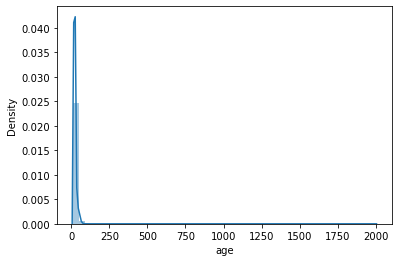

In [21]:
sns.distplot(dataframe['age'])

<AxesSubplot:xlabel='age'>

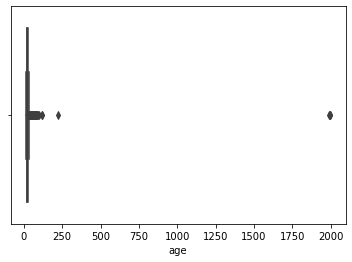

In [22]:
sns.boxplot(dataframe['age'])

In [23]:
print("Using IQR method")
print(computeIQR(dataframe['age']))
print("-----")
print("Using STD")
print(computeSTD(dataframe['age']))

Using IQR method
(7.5, 35.5)
-----
Using STD
(0, 88.35652144924609)


In [24]:
dataframe['age'].value_counts()

20      3789
21      3535
19      3510
18      3046
22      3009
23      2523
17      2309
16      2123
24      1918
25      1709
15      1415
26      1220
27      1026
14       933
28       852
29       641
30       623
13       489
31       443
32       424
33       396
34       311
35       293
36       238
38       231
37       200
40       197
39       178
42       170
45       146
47       139
41       124
55       120
44       118
50       118
46       118
43       116
48       107
49        88
52        85
53        83
54        72
51        69
57        68
56        59
58        56
60        42
61        40
59        35
62        29
63        26
65        23
64        23
66        16
67        14
68        12
72        10
70         9
71         8
69         8
75         8
73         6
77         4
79         4
80         4
76         3
74         2
1993       1
115        1
1991       1
1998       1
85         1
82         1
117        1
89         1
1996       1
223        1

In [25]:
# USING STD TECHNIQUE TO DEAL WITH OUTLIERS
lowerlimit, upperlimit = computeSTD(dataframe['age'])
print("Lower age = ", lowerlimit)
print("Upper age = ", upperlimit)

dataframe.loc[(dataframe['age'] < lowerlimit) | (dataframe['age'] > upperlimit),"age"] = dataframe['age'].median()

Lower age =  0
Upper age =  88.35652144924609


<AxesSubplot:xlabel='age', ylabel='Density'>

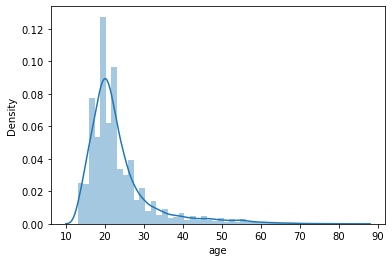

In [26]:
sns.distplot(dataframe['age'])

<AxesSubplot:xlabel='age'>

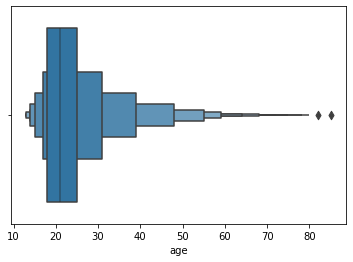

In [27]:
sns.boxenplot(x=dataframe['age']) 

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Family Size</p>

<AxesSubplot:xlabel='familysize', ylabel='Density'>

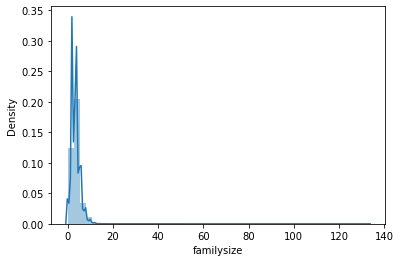

In [28]:
sns.distplot(dataframe['familysize'])

<AxesSubplot:xlabel='familysize'>

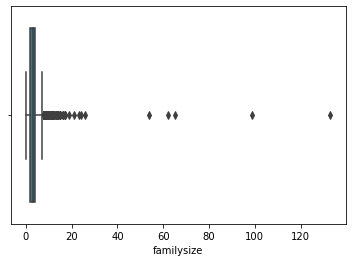

In [29]:
sns.boxplot(dataframe['familysize'])

In [30]:
dataframe['familysize'].value_counts()

3      9206
2      9018
4      7539
5      4830
1      2946
6      2450
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: familysize, dtype: int64

In [31]:
print("Using IQR method")
print(computeIQR(dataframe['familysize']))
print("-----")
print("Using STD")
print(computeSTD(dataframe['familysize']))

Using IQR method
(0, 7.0)
-----
Using STD
(0, 9.934744200169776)


In [32]:
# USING STD TECHNIQUE TO DEAL WITH OUTLIERS
lowerlimit, upperlimit = computeSTD(dataframe['familysize'])
print("Lower familysize = ", lowerlimit)
print("Upper familysize = ", upperlimit)

dataframe.loc[(dataframe['familysize'] < lowerlimit) | (dataframe['familysize'] > upperlimit),"familysize"]= dataframe['familysize'].median()

Lower familysize =  0
Upper familysize =  9.934744200169776


<AxesSubplot:xlabel='familysize', ylabel='Density'>

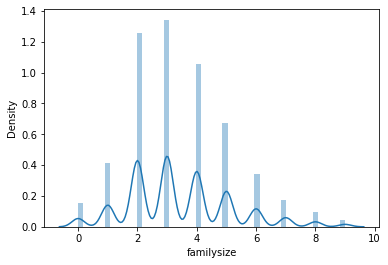

In [33]:
sns.distplot(dataframe['familysize'])

<AxesSubplot:xlabel='familysize'>

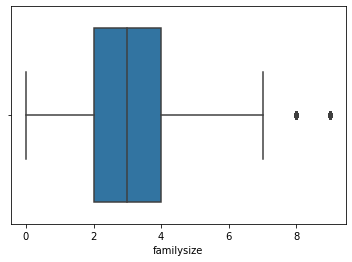

In [34]:
sns.boxplot(dataframe['familysize'])

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Married</p>

In [35]:
dataframe['married'].value_counts()

1    34131
2     4357
3     1092
0      195
Name: married, dtype: int64

In [36]:
# USING MEDIAN FUNCTION TECHNIQUE TO DEAL WITH INVALID INPUT
dataframe.loc[dataframe['married'] == 0,"married"]= dataframe['married'].median()

In [37]:
dataframe['married'].value_counts()

1    34326
2     4357
3     1092
Name: married, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Urban</p>

In [38]:
dataframe['urban'].value_counts()

3    17843
2    13232
1     8318
0      382
Name: urban, dtype: int64

In [39]:
# USING MEDIAN FUNCTION TECHNIQUE TO DEAL WITH INVALID INPUT
dataframe.loc[dataframe['urban'] == 0,"urban"]= dataframe['urban'].median()

In [40]:
dataframe['urban'].value_counts()

3    17843
2    13614
1     8318
Name: urban, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Gender</p>

In [41]:
dataframe['gender'].value_counts()

2    30367
1     8789
3      552
0       67
Name: gender, dtype: int64

In [42]:
dataframe.loc[dataframe['gender'] == 0,"gender"] = dataframe['gender'].median()

In [43]:
dataframe['gender'].value_counts()

2    30434
1     8789
3      552
Name: gender, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Orientation</p>

In [44]:
dataframe['orientation'].value_counts()

1    24269
2     5006
5     3460
0     3109
4     1976
3     1955
Name: orientation, dtype: int64

In [45]:
# USING MEDIAN FUNCTION TECHNIQUE TO DEAL WITH INVALID INPUT
dataframe.loc[dataframe['orientation'] == 0,"orientation"] = dataframe['orientation'].median()

In [46]:
dataframe['orientation'].value_counts()

1    27378
2     5006
5     3460
4     1976
3     1955
Name: orientation, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Orientation</p>

In [47]:
dataframe['orientation'].value_counts()

1    27378
2     5006
5     3460
4     1976
3     1955
Name: orientation, dtype: int64

In [48]:
# USING MEDIAN FUNCTION TECHNIQUE TO DEAL WITH INVALID INPUT
dataframe.loc[dataframe['orientation'] == 0,"orientation"] = dataframe['orientation'].median()

In [49]:
dataframe['orientation'].value_counts()

1    27378
2     5006
5     3460
4     1976
3     1955
Name: orientation, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Religion</p>

In [50]:
dataframe['religion'].value_counts()

10    22073
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
0       356
9       144
5       122
11       64
Name: religion, dtype: int64

In [51]:
# USING MEDIAN FUNCTION TECHNIQUE TO DEAL WITH INVALID INPUT
dataframe.loc[dataframe['religion'] == 0,"religion"] = dataframe['religion'].median()

In [52]:
dataframe['religion'].value_counts()

10    22429
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
9       144
5       122
11       64
Name: religion, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Education</p>

In [53]:
dataframe['education'].value_counts()

3    15120
2    15066
4     5008
1     4066
0      515
Name: education, dtype: int64

In [54]:
# USING MEDIAN FUNCTION TECHNIQUE TO DEAL WITH INVALID INPUT
dataframe.loc[dataframe['education'] == 0,"education"] = dataframe['education'].median()

In [55]:
dataframe['education'].value_counts()

3    15635
2    15066
4     5008
1     4066
Name: education, dtype: int64

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>FEATURE SELECTION</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Adding Depression scale feature</p>

In [56]:
dataframe['total_score'] = 0

In [57]:
dataframe.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize,total_score
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2,0
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,1,70,1,4,0
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3,0
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5,0
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4,0


In [58]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

for ind in dataframe.index:
    temp = 0
    for i in DASS_keys["Depression"]:
        temp += dataframe['Q'+str(i)+'A'][ind]-1
    dataframe['total_score'][ind] = temp

In [59]:
def condition(score):
    if score <= 9:cvfdaebgswrq3t4 n
        return 'Normal'
    if  10 <= score <= 13:
        return 'Mild'
    if 14 <= score <= 20:
        return 'Moderate'
    if 21 <= score <= 27:
        return 'Severe'
    if score > 28:
        return 'Extremely Severe'

dataframe['depression_scale'] = dataframe['total_score'].apply(condition)

In [60]:
dataframe.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize,total_score,depression_scale
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2,27,Severe
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,1,70,1,4,24,Severe
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3,39,Extremely Severe
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5,16,Moderate
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4,32,Extremely Severe


<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Adding Age group feature</p>

In [61]:
def age_group(age):
    if age < 13:
        return 'Child'
    if  13 <= age < 18:
        return 'Adolescence'
    if 18 <= age < 60:
            return 'Adult'
    if age <= 60:
        return 'Senior Adult'
    
dataframe['age_group']= dataframe['age'].apply(age_group)

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Removing irrelevant feature</p>

In [62]:
dataframe.drop(['age', 'total_score'], axis=1, inplace=True)

In [63]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
for i in DASS_keys["Anxiety"]:
    dataframe.drop(['Q'+str(i)+'A'], axis=1, inplace=True) 
    
for i in DASS_keys["Stress"]:
    dataframe.drop(['Q'+str(i)+'A'], axis=1, inplace=True) 

In [64]:
dataframe.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,orientation,race,married,familysize,depression_scale,age_group
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1,10,1,2,Severe,Adolescence
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,1,70,1,4,Severe,Adolescence
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,3,60,1,3,Extremely Severe,Adolescence
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,5,70,1,5,Moderate,Adolescence
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1,10,1,4,Extremely Severe,Adult


<hr>

<h2 style="text-align: center; letter-spacing: 2px;">Exploratory Data Analysis</h2>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Extracting Insights | univariate</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>education</b> feature</p>

<AxesSubplot:xlabel='education', ylabel='count'>

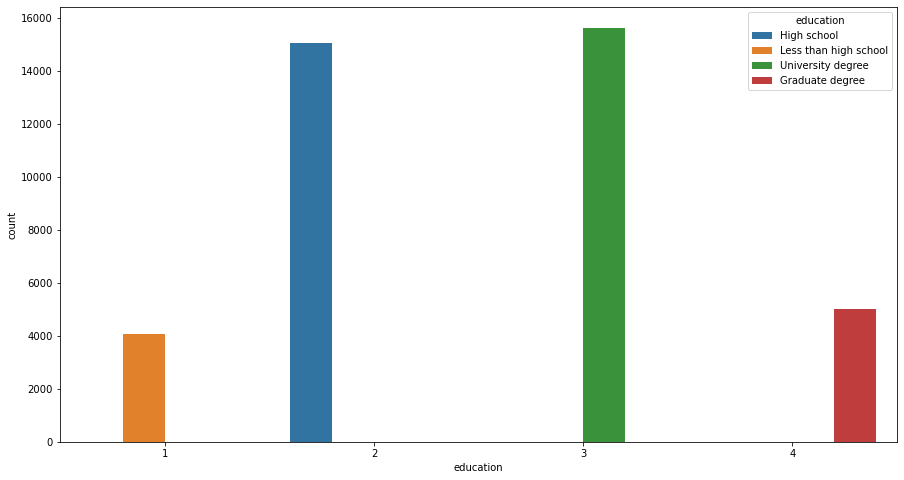

In [65]:
# MAPPING
dataframe['education'] = dataframe['education'].map({1: 1, 2: 2, 3: 3, 4: 4 })

# INFORMATION
def changeEducationTitle(value) -> str:
    if value == 0 or value == 1:
        return 'Less than high school'
    if value == 2:
        return 'High school'
    if value == 3: 
        return 'University degree'
    if value == 4: 
        return 'Graduate degree'
    return value

# APPLYING CORRESPONDING INFORMATION TO ITS INITIAL NUMERIC DATA
education_string = dataframe['education'].apply(changeEducationTitle)

# PLOTTING
plt.figure(figsize=(15, 8))
sns.countplot(x=dataframe['education'], hue=education_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most people who participated in the survey are university students.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>urban</b> feature</p>

<AxesSubplot:xlabel='urban', ylabel='count'>

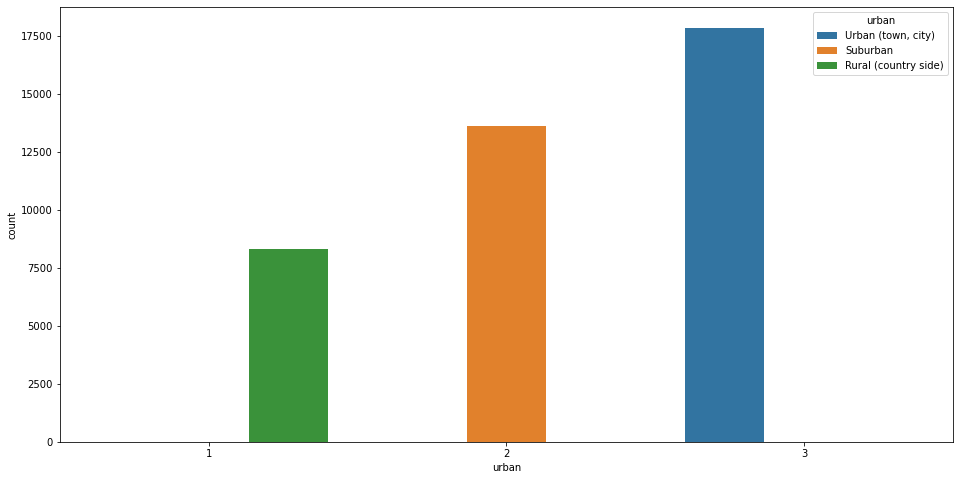

In [66]:
# MAPPING
dataframe['urban'] = dataframe['urban'].map({1: 1, 2: 2, 3: 3})

# INFORMATION
def changeUrbanValue(value):
    if value == 1:
        return 'Rural (country side)'
    if value == 2:
        return 'Suburban'
    if value == 3:
        return 'Urban (town, city)'
    return value 

# APPLYING CORRESPONDING INFORMATION TO ITS INITIAL NUMERIC DATA
urban_string = dataframe['urban'].apply(changeUrbanValue)

# PLOTTING
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['urban'], hue= urban_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most people who participated in the survey are living in a urban area when they were a child.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>religion</b> feature</p>

<AxesSubplot:xlabel='religion', ylabel='count'>

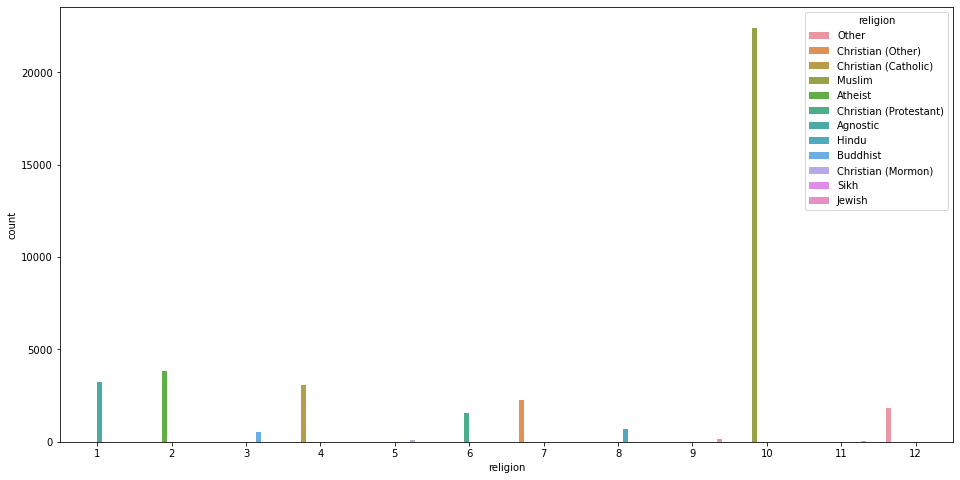

In [67]:
# INFORMATION
def changeReligionValue(value):
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if value == 4:
        return 'Christian (Catholic)'
    if value == 5:
        return 'Christian (Mormon)'
    if value == 6:
        return 'Christian (Protestant)'
    if value == 7:
        return 'Christian (Other)'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
    if value == 12:
        return 'Other'
    return value 

# APPLYING CORRESPONDING INFORMATION TO ITS INITIAL NUMERIC DATA
religion_string = dataframe['religion'].apply(changeReligionValue)

# PLOTTING
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['religion'], hue = religion_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most religion who participated in the survey are muslims.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>race</b> feature</p>

<AxesSubplot:xlabel='race', ylabel='count'>

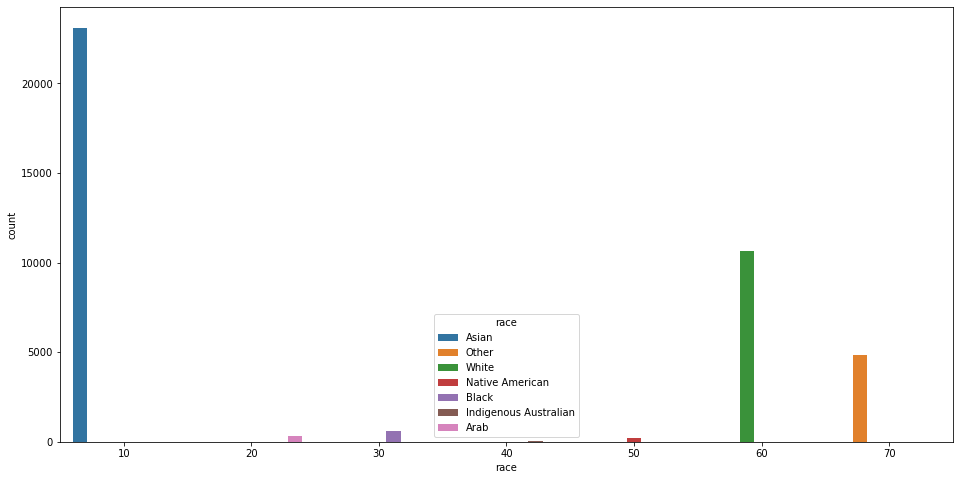

In [68]:
# INFORMATION
def changeRaceValue(value):
    if value == 10:
        return 'Asian'
    if value == 20:
        return 'Arab'
    if value == 30:
        return 'Black'
    if value == 40:
        return 'Indigenous Australian'
    if value == 50:  
        return 'Native American'
    if value == 60:  
        return 'White'
    if value == 70:  
        return 'Other'
    return value 

# APPLYING CORRESPONDING INFORMATION TO ITS INITIAL NUMERIC DATA
race_string = dataframe['race'].apply(changeRaceValue)

# PLOTTING
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['race'], hue = race_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most race who participated in the survey are asians.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>married</b> feature</p>

<AxesSubplot:xlabel='married', ylabel='count'>

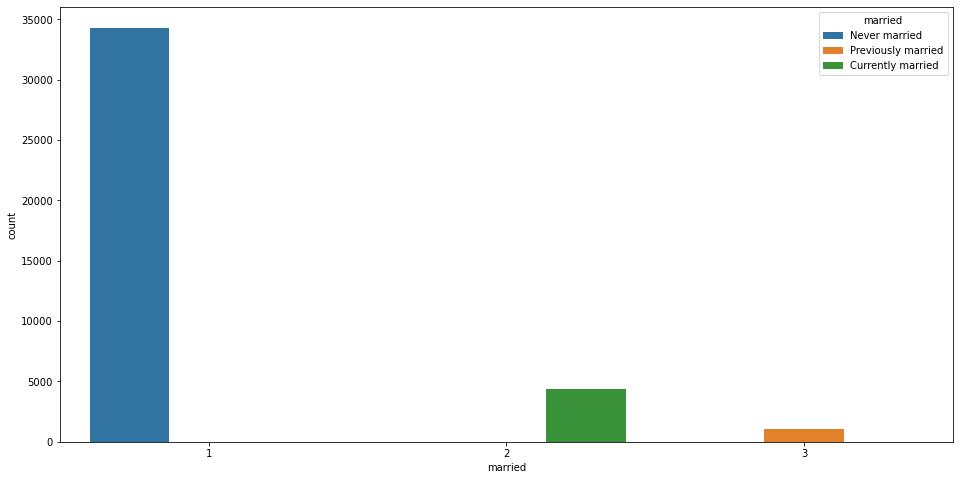

In [69]:
# INFORMATION
def changeMarriedValue(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value 

# APPLYING CORRESPONDING INFORMATION TO ITS INITIAL NUMERIC DATA
married_string = dataframe['married'].apply(changeMarriedValue)

# PLOTTING
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['married'], hue= married_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most people who participated in the survey are never married.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>familysize</b> feature</p>

<AxesSubplot:xlabel='familysize', ylabel='count'>

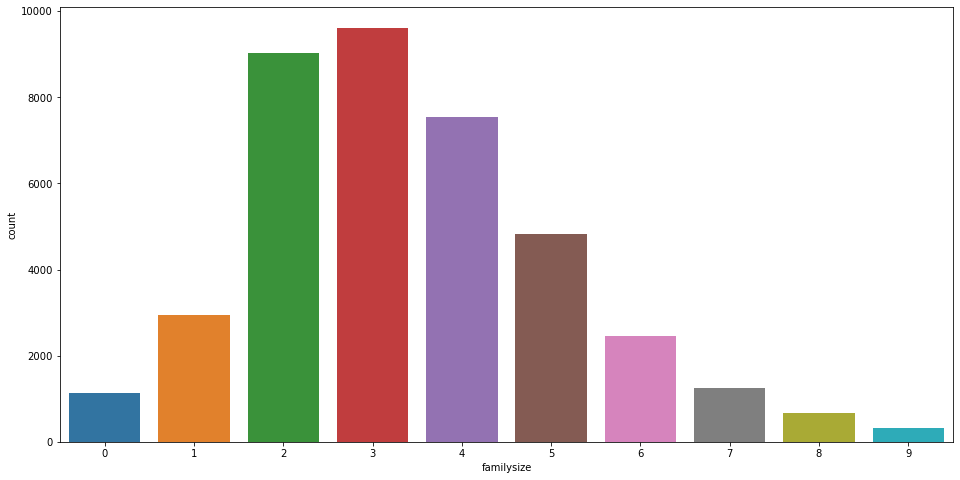

In [70]:
# PLOTTING
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['familysize'])

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most familysize of the respondents are from 2 to 4.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>orientation</b> feature</p>

<AxesSubplot:xlabel='orientation', ylabel='count'>

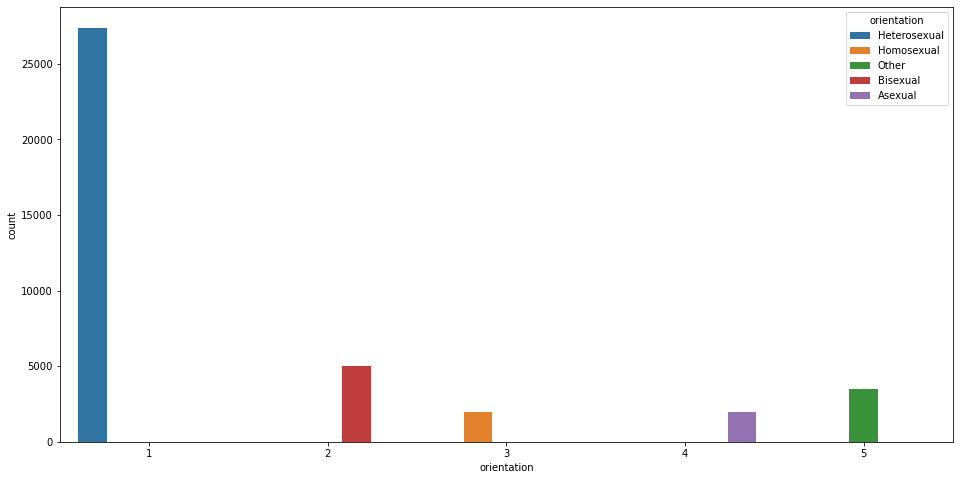

In [71]:
# INFORMATION
def changeOrientationValue(value):
    if value == 1:
        return 'Heterosexual'
    if value == 2:
        return 'Bisexual'
    if value == 3:
        return 'Homosexual'
    if value == 4:
        return 'Asexual'
    if value == 5:
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
orientation_string = dataframe['orientation'].apply(changeOrientationValue)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['orientation'], hue = orientation_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most sex orientation who participated in the survey are heterosexuals.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>gender</b> feature</p>

<AxesSubplot:xlabel='gender', ylabel='count'>

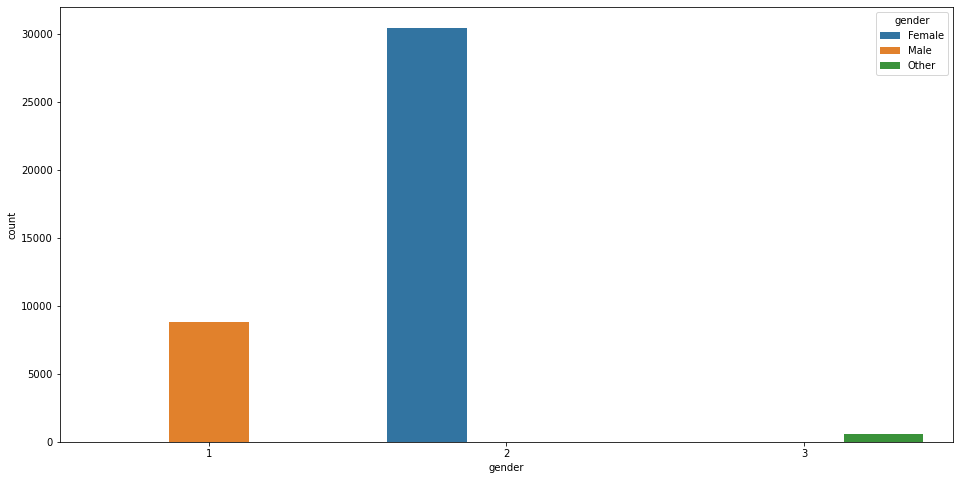

In [72]:
# INFORMATION
def changeGenderValue(value):
    if value == 1:
        return 'Male'
    if value == 2:
        return 'Female'
    if value == 3:
        return 'Other'

# applying corresponding information to its initial numeric data
gender_string = dataframe['gender'].apply(changeGenderValue)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['gender'], hue = gender_string)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most gender who participated in the survey are females.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>age_group</b> feature</p>

<AxesSubplot:xlabel='age_group', ylabel='count'>

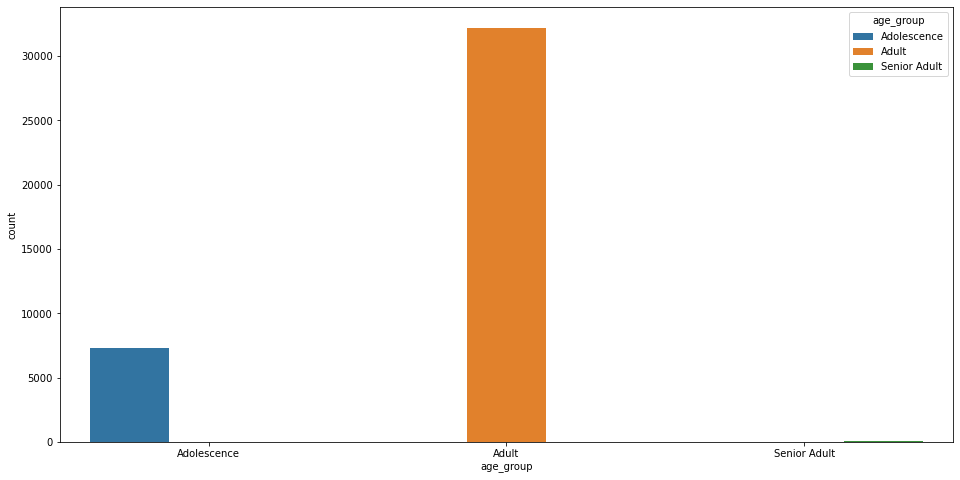

In [73]:
# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['age_group'], hue = dataframe['age_group'])

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most age group who participated in the survey are adults.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>depresion_scale</b> feature</p>

<AxesSubplot:xlabel='depression_scale', ylabel='count'>

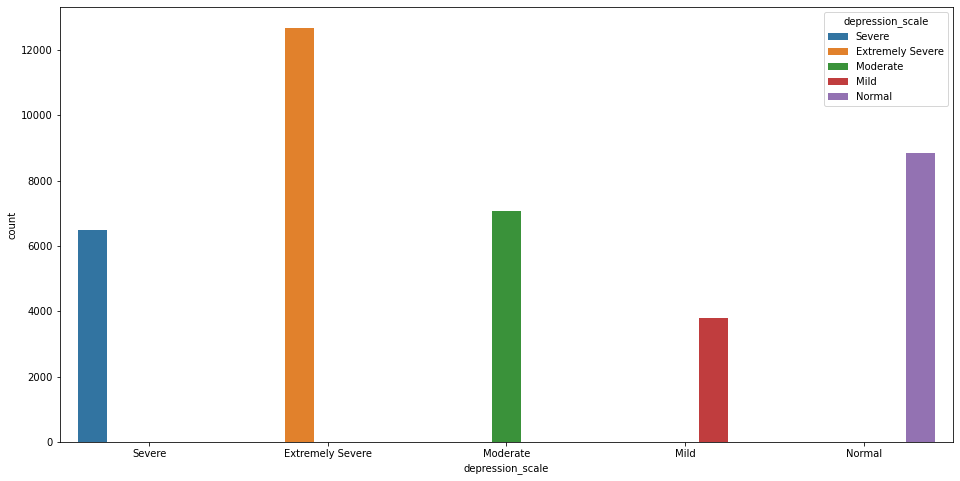

In [74]:
# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['depression_scale'], hue = dataframe['depression_scale'])

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">The most people who participated in the survey are experiencing extremely severe depression.</p>

<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Extracting Insights | Bivariate</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>education</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Educations')

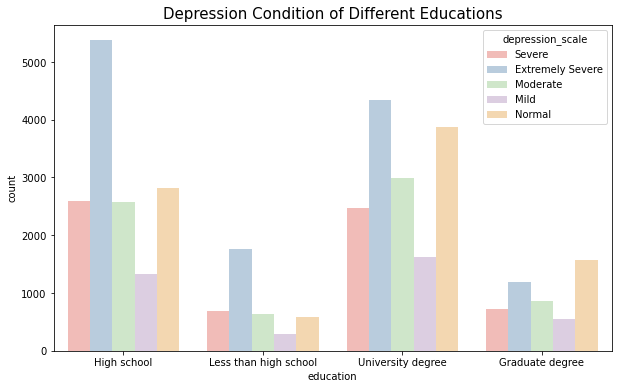

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(education_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Educations',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of high schoolers are experiencing extremely severe depression despite the fact that most of the respondents are from university degree.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>urban</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Locations')

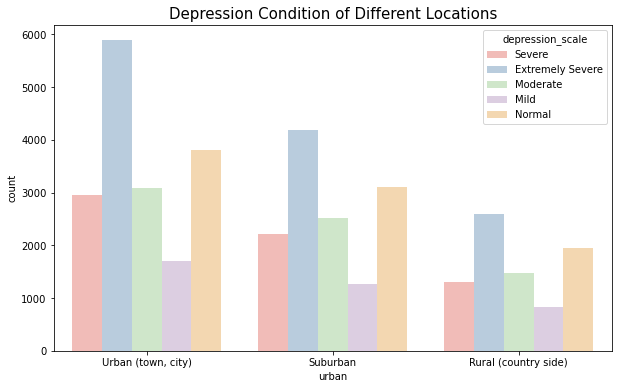

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(urban_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Locations',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of respondents who are living in urban location when they were a child are experiencing extremely severe depression than living in a suburban and rural location.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>religion</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Religions')

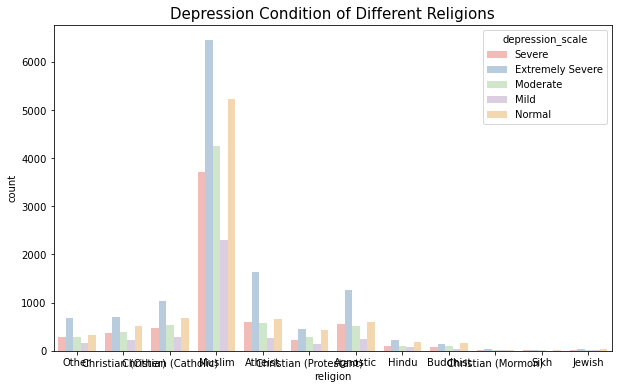

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(religion_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Religions',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of muslim respondents are experiencing extremely severe depression.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>race</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Races')

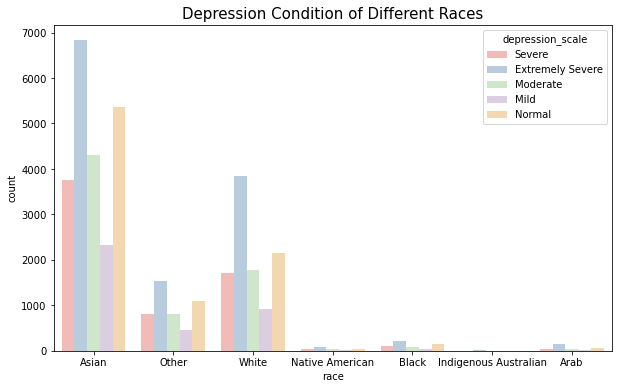

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(race_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Races',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of asian respondents are experiencing extremely severe depression.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>married</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different married status')

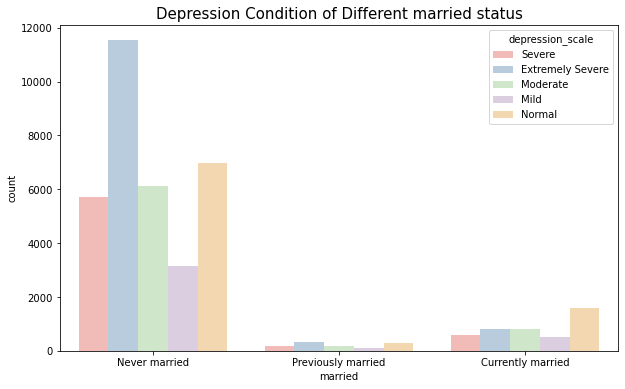

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(married_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different married status',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of respondents who are  never married are experiencing extremely severe depression.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>familysize</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different family sizes')

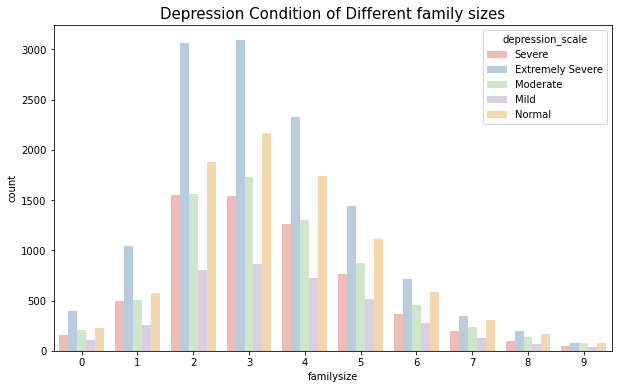

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(dataframe.sort_values('familysize').familysize,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different family sizes',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of respondents who are having 2 to 3 familysize are experiencing extremely severe depression.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>orientation</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Religions')

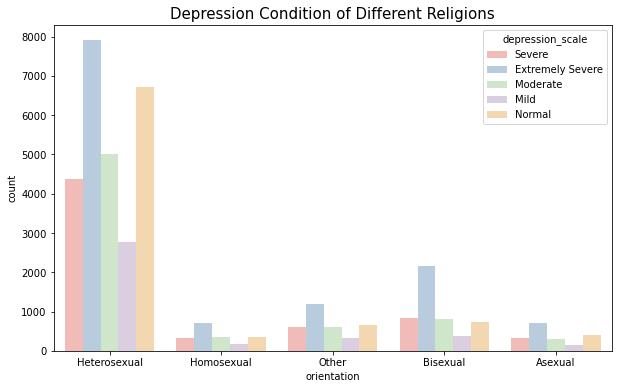

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(orientation_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Religions',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of heterosexual respondents are experiencing extremely severe depression. To add, in other sex orientation, bisexual respondents are more likely to experience extremely severe depression.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>gender</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Religions')

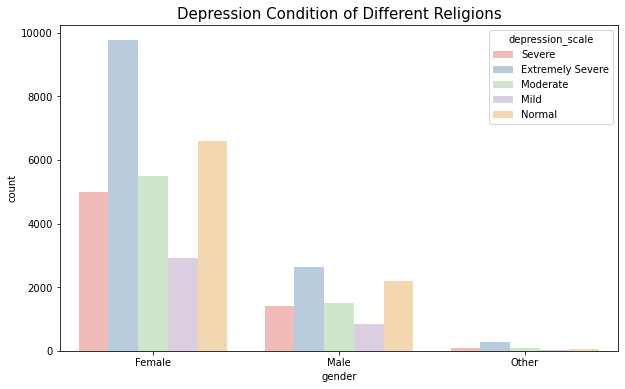

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(gender_string,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Religions',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of female respondents are experiencing extremely severe depression.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>age_group</b> and <b>target</b> feature</p>

Text(0.5, 1.0, 'Depression Condition of Different Religions')

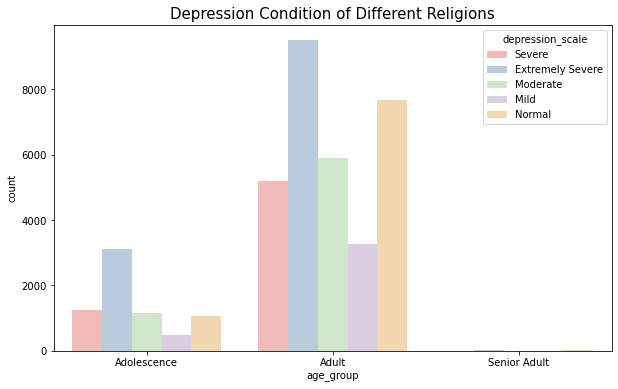

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(dataframe.sort_values('age_group').age_group,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Religions',fontsize=15)

<br>
<p style="text-align:center; background-color: #F5F5DC;padding: 15px 0; border: 1px solid black">A lot of adult respondents are experiencing extremely severe depression.</p>

<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>one hot encoder</b></p>

In [84]:
def labelEncoderManual(value):
    if value =='Child':
        return 1
    elif value =='Adolescence':
        return 2
    elif value=='Adult':
        return 3
    else:
        return 4
    
dataframe['age_group'] = dataframe['age_group'].apply(labelEncoderManual)

In [85]:
def labelEncoderManual(value):
    if value =='Normal':
        return 1
    elif value =='Mild':
        return 2
    elif value=='Moderate':
        return 3
    elif value=='Severe':
        return 4
    else:
        return 5
    
dataframe['depression_scale'] = dataframe['depression_scale'].apply(labelEncoderManual)

In [86]:
dataframe.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,orientation,race,married,familysize,depression_scale,age_group
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1,10,1,2,4,2
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,1,70,1,4,4,2
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,3,60,1,3,5,2
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,5,70,1,5,3,2
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1,10,1,4,5,3


<hr>

<h2 style="text-align: center; letter-spacing: 2px;">Model</h2>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Import tools for model</b></p>

In [87]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error
from pandas import DataFrame

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Scale the data</p>

In [88]:
feature_column = dataframe.columns.difference(['depression_scale'])

In [89]:
st_scaler = MinMaxScaler()
scaled_df = DataFrame(st_scaler.fit_transform(dataframe[feature_column]))

In [90]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.000000,1.0,1.000000,0.666667,0.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.333333,0.333333,1.000000,1.000000,0.142857,0.142857,0.714286,1.000000,1.000000,1.000000,1.000000,1.000000,0.714286,0.142857,0.0,0.333333,0.222222,0.5,0.0,0.0,0.000000,1.000000,1.0
1,0.333333,1.0,0.666667,1.000000,0.333333,0.333333,0.666667,0.333333,0.333333,1.000000,0.333333,0.333333,0.333333,1.000000,0.857143,0.714286,0.714286,0.571429,1.000000,0.714286,0.571429,1.000000,1.000000,0.142857,0.0,0.333333,0.444444,0.5,0.0,0.0,1.000000,0.545455,1.0
2,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.285714,0.285714,0.714286,0.285714,0.285714,0.714286,0.857143,0.714286,0.714286,0.428571,0.0,0.333333,0.333333,0.5,0.0,0.5,0.833333,0.272727,1.0
3,0.666667,0.0,0.333333,0.666667,0.000000,0.000000,0.333333,0.666667,1.000000,0.333333,0.000000,0.333333,0.333333,0.666667,0.142857,0.142857,0.142857,1.000000,0.571429,0.857143,0.571429,0.857143,0.142857,0.857143,0.0,0.000000,0.555556,0.5,0.0,1.0,1.000000,0.272727,1.0
4,0.666667,1.0,0.666667,1.000000,0.666667,0.333333,1.000000,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,1.000000,0.285714,0.428571,0.714286,0.428571,0.857143,0.714286,0.714286,0.714286,0.857143,0.428571,0.5,0.666667,0.444444,0.5,0.0,0.0,0.000000,0.818182,0.5


In [91]:
scaled_df.shape 

(39775, 33)

<function matplotlib.pyplot.show(close=None, block=None)>

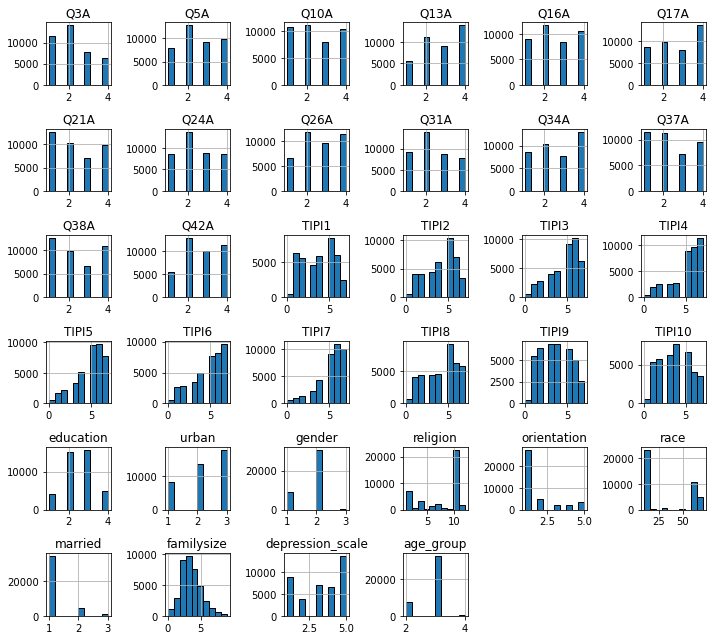

In [92]:
#Plot histogram of raw data
dataframe.hist(figsize=(10,9), ec="k")
plt.title('Calories/kg')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

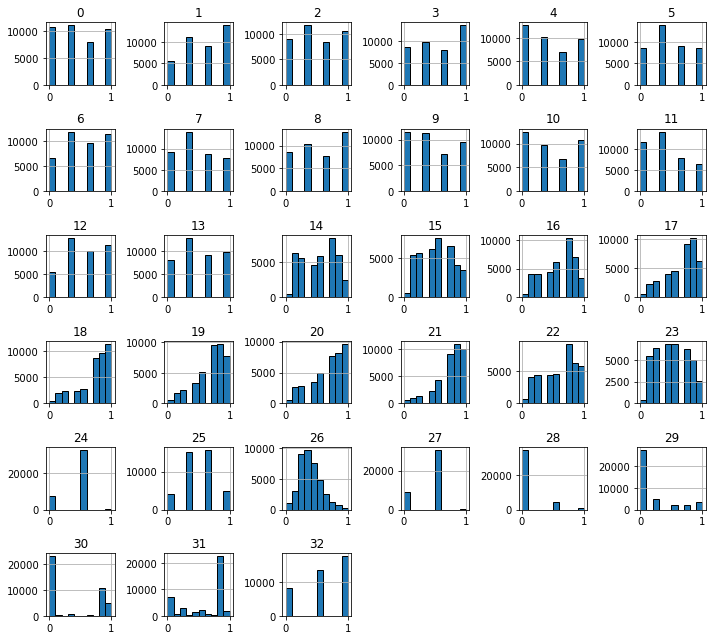

In [93]:
#Plot histogram of raw data
scaled_df.hist(figsize=(10,9), ec="k")
plt.title('Scaled Data')
plt.tight_layout()
plt.show

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Split the data</p>

In [94]:
target_feature = dataframes[['depression_scale']]
feature_feature = dataframes[dataframes.columns.difference(['depression_scale'])]

In [95]:
X_train,X_test,y_train,y_test=train_test_split(feature_feature, target_feature,test_size=0.2, random_state= 42)

In [96]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (31820, 33) (31820, 1)
Test Set: (7955, 33) (7955, 1)


<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Train using multiple machine learning algorithms</p>

In [97]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
import math

In [98]:
models = dict()

In [99]:
models['svml'] = SVC(kernel='linear')
models['svmp'] = SVC(kernel='poly')
models['cart'] = DecisionTreeClassifier()
models['lr'] = LogisticRegression()
models['cart'] = GaussianNB()

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Running cross validation</p>

In [100]:
for name, model in models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')
    print(name, '\n5-Fold Validation Scores:\n', scores)
    print('Cross Validation Average Score and StDev: %.3f (%.3f)\n' % (mean(scores), std(scores)))

svml 
5-Fold Validation Scores:
 [1. 1. 1. 1. 1.]
Cross Validation Average Score and StDev: 1.000 (0.000)

svmp 
5-Fold Validation Scores:
 [0.88120679 0.87696417 0.88120679 0.87303583 0.87115022]
Cross Validation Average Score and StDev: 0.877 (0.004)

cart 
5-Fold Validation Scores:
 [0.86517913 0.86360779 0.86800754 0.86313639 0.8645506 ]
Cross Validation Average Score and StDev: 0.865 (0.002)

lr 
5-Fold Validation Scores:
 [0.79572596 0.79446889 0.79321182 0.78991201 0.77451288]
Cross Validation Average Score and StDev: 0.790 (0.008)



<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Running confusion matrix</p>

In [98]:
results = dict()
for name, model in models.items():
    model.fit(X_train,y_train)
    predicted=model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(y_test, predicted)
    print("Confusion Matrix: \n", res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print("Accuracy:", res_acc)
    results[name] = res_acc


Algorithm:  svml
Confusion Matrix: 
 [[1773    0    0    0    0]
 [   0  740    0    0    0]
 [   0    0 1439    0    0]
 [   0    0    0 1304    0]
 [   0    0    0    0 2699]]
Accuracy: 1.0

Algorithm:  svmp
Confusion Matrix: 
 [[1736   33    4    0    0]
 [ 233  216  291    0    0]
 [  23   28 1322   66    0]
 [   3    0  117 1135   49]
 [   0    0    8   91 2600]]
Accuracy: 0.8810810810810811

Algorithm:  cart
Confusion Matrix: 
 [[1497  275    1    0    0]
 [   6  624  110    0    0]
 [   0  132 1216   91    0]
 [   0    0   84 1218    2]
 [   0    0    0  374 2325]]
Accuracy: 0.8648648648648649

Algorithm:  lr
Confusion Matrix: 
 [[1613  129   26    5    0]
 [ 188  309  239    3    1]
 [   5  136 1070  208   20]
 [   0    0  266  719  319]
 [   0    0    8  155 2536]]
Accuracy: 0.7852922690131993


<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Exporting the model</b></p>

In [99]:
import pickle
pickle.dump(models['svml'], open('model.pkl','wb'))

In [100]:
test_model = pickle.load(open('model.pkl','rb'))

In [101]:
new_Xdata = X_test.sample(10)
new_ydata = y_test.loc[new_Xdata.index.values]
print(new_Xdata)
print(new_ydata)

       Q10A  Q13A  Q16A  Q17A  Q21A  Q24A  Q26A  Q31A  Q34A  Q37A  Q38A  Q3A  \
22514     2     3     2     2     2     2     2     2     3     3     2    2   
21858     4     2     2     4     1     2     4     2     4     4     2    2   
39016     1     2     3     2     2     1     2     2     2     1     2    2   
27784     3     4     3     4     2     4     4     3     3     2     3    3   
37918     2     2     1     2     2     2     1     2     1     2     1    2   
24896     3     3     2     3     2     2     3     3     4     3     1    2   
25308     2     4     2     4     4     3     4     2     4     2     4    3   
5838      1     1     1     1     1     1     1     1     1     1     1    1   
30256     2     2     2     2     2     1     1     1     2     2     3    2   
29744     1     2     1     1     1     2     1     2     1     2     1    1   

       Q42A  Q5A  TIPI1  TIPI10  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  \
22514     2    2      1       3      6    

In [102]:
pred=test_model.predict(new_Xdata)
print(pred)

[3 4 2 5 2 3 5 1 2 1]


In [103]:
print(new_ydata.values)

[[3]
 [4]
 [2]
 [5]
 [2]
 [3]
 [5]
 [1]
 [2]
 [1]]
